## Business Case : 
# A study of Unsupervised Learning techniques on the FIFA 20 dataset.

In this project we explore the data through the domain of unsupervised learning performing principal component analysis and clustering analysis. One goal of this project is to best describe the variation in the different types of players. Doing so would equip us with insight into how to best choose players in a team. In a high-dimensional data, it is often difficult to develop an intuition of the features and our goal in this project is to reduce the dimensionality of the dataset so that we can visualize the relationships between the features and clusters in our dataset. We start with 104 features and bring down the dimensionality to 28 features by selecting key features using our domain knowledge, removing highly correlated features using regression techniques, and then further to just two principal components using PCA. We visualize the data using these principal components, perform clustering analysis and visualize the clusters and develop an inference for the same.

### Importing the data

In [28]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from IPython.display import HTML, display
import seaborn as sns

In [29]:
pd.set_option('display.max_columns', 500)
data = pd.read_csv('players_20.csv') 

In [30]:
display(data.head())
print(f'The Data has {data.shape[0]} rows and {data.shape[1]} features')

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,overall,potential,value_eur,wage_eur,player_positions,preferred_foot,international_reputation,weak_foot,skill_moves,work_rate,body_type,real_face,release_clause_eur,player_tags,team_position,team_jersey_number,loaned_from,joined,contract_valid_until,nation_position,nation_jersey_number,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,player_traits,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,32,1987-06-24,170,72,Argentina,FC Barcelona,94,94,95500000,565000,"RW, CF, ST",Left,5,4,4,Medium/Low,Messi,Yes,195800000.0,"#Dribbler, #Distance Shooter, #Crosser, #FK Sp...",RW,10.0,NaN,2004-07-01,2021.0,NaN,NaN,87.0,92.0,92.0,96.0,39.0,66.0,NaN,NaN,NaN,NaN,NaN,NaN,"Beat Offside Trap, Argues with Officials, Earl...",88,95,70,92,88,97,93,94,92,96,91,84,93,95,95,86,68,75,68,94,48,40,94,94,75,96,33,37,26,6,11,15,14,8,89+2,89+2,89+2,93+2,93+2,93+2,93+2,93+2,93+2,93+2,93+2,92+2,87+2,87+2,87+2,92+2,68+2,66+2,66+2,66+2,68+2,63+2,52+2,52+2,52+2,63+2
1,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,34,1985-02-05,187,83,Portugal,Juventus,93,93,58500000,405000,"ST, LW",Right,5,4,5,High/Low,C. Ronaldo,Yes,96500000.0,"#Speedster, #Dribbler, #Distance Shooter, #Acr...",LW,7.0,NaN,2018-07-10,2022.0,LS,7.0,90.0,93.0,82.0,89.0,35.0,78.0,NaN,NaN,NaN,NaN,NaN,NaN,"Long Throw-in, Selfish, Argues with Officials,...",84,94,89,83,87,89,81,76,77,92,89,91,87,96,71,95,95,85,78,93,63,29,95,82,85,95,28,32,24,7,11,15,14,11,91+3,91+3,91+3,89+3,90+3,90+3,90+3,89+3,88+3,88+3,88+3,88+3,81+3,81+3,81+3,88+3,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3
2,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Junior,27,1992-02-05,175,68,Brazil,Paris Saint-Germain,92,92,105500000,290000,"LW, CAM",Right,5,5,5,High/Medium,Neymar,Yes,195200000.0,"#Speedster, #Dribbler, #Playmaker , #Crosser,...",CAM,10.0,NaN,2017-08-03,2022.0,LW,10.0,91.0,85.0,87.0,95.0,32.0,58.0,NaN,NaN,NaN,NaN,NaN,NaN,"Power Free-Kick, Injury Free, Selfish, Early C...",87,87,62,87,87,96,88,87,81,95,94,89,96,92,84,80,61,81,49,84,51,36,87,90,90,94,27,26,29,9,9,15,15,11,84+3,84+3,84+3,90+3,89+3,89+3,89+3,90+3,90+3,90+3,90+3,89+3,82+3,82+3,82+3,89+3,66+3,61+3,61+3,61+3,66+3,61+3,46+3,46+3,46+3,61+3
3,200389,https://sofifa.com/player/200389/jan-oblak/20/...,J. Oblak,Jan Oblak,26,1993-01-07,188,87,Slovenia,Atlético Madrid,91,93,77500000,125000,GK,Right,3,3,1,Medium/Medium,Normal,Yes,164700000.0,NaN,GK,13.0,NaN,2014-07-16,2023.0,GK,1.0,NaN,NaN,NaN,NaN,NaN,NaN,87.0,92.0,78.0,89.0,52.0,90.0,"Flair, Acrobatic Clearance",13,11,15,43,13,12,13,14,40,30,43,60,67,88,49,59,78,41,78,12,34,19,11,65,11,68,27,12,18,87,92,78,90,89,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,183277,https://sofifa.com/player/183277/eden-hazard/2...,E. Hazard,Eden Hazard,28,1991-01-07,175,74,Belgium,Real Madrid,91,91,90000000,470000,"LW, CF",Right,4,4,4,High/Medium,Normal,Yes,184500000.0,"#Speedster, #Dribbler, #Acrobat",LW,7.0,NaN,2019-07-01,

The Data has 18278 rows and 104 features


## Data Understanding and cleaning

Some key observations in the dataset:
-	`potential` and `overall` are highly correlated. `potential` is basically an integer greater than or equal to `overall`.
-	`overall` is a computation based on all the other skill ratings of a player such as `shooting`, `passing`, etc.
-	Unless a player plays at a Goalkeeper position (`GW`), all his goalkeeper statistics are `NaNs`.
-	The columns `ls`, `st`, `rs`, `lw` etc. are playing positions in the game and the data in these columns is basically the max potential of a player if he were to play in that position. We will assume a player only plays in his preferred position and we will drop all these columns.
-	For our analysis, we will drop all columns *unnecessary for our analysis as and when we reach that conclusion*. For now, all descriptive columns like `sofifa_id`, `player_url`, `nationality` etc. will be dropped.
-	`player_positions` are the preferred positions of the player. We will keep only the first playing position for our analysis.


In [31]:
data['player_positions'] = data['player_positions'].str.split(',').str[0]

Prior to dropping our columns as discussed above, lets take a  copy of the data. Since we are interested to see the clusters the data forms, it would be interesting to take some samples from various playing positions and see how they get transformed into our clusters.  

In [32]:
original_data = data.copy()
original_data.head()

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,overall,potential,value_eur,wage_eur,player_positions,preferred_foot,international_reputation,weak_foot,skill_moves,work_rate,body_type,real_face,release_clause_eur,player_tags,team_position,team_jersey_number,loaned_from,joined,contract_valid_until,nation_position,nation_jersey_number,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,player_traits,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,32,1987-06-24,170,72,Argentina,FC Barcelona,94,94,95500000,565000,RW,Left,5,4,4,Medium/Low,Messi,Yes,195800000.0,"#Dribbler, #Distance Shooter, #Crosser, #FK Sp...",RW,10.0,NaN,2004-07-01,2021.0,NaN,NaN,87.0,92.0,92.0,96.0,39.0,66.0,NaN,NaN,NaN,NaN,NaN,NaN,"Beat Offside Trap, Argues with Officials, Earl...",88,95,70,92,88,97,93,94,92,96,91,84,93,95,95,86,68,75,68,94,48,40,94,94,75,96,33,37,26,6,11,15,14,8,89+2,89+2,89+2,93+2,93+2,93+2,93+2,93+2,93+2,93+2,93+2,92+2,87+2,87+2,87+2,92+2,68+2,66+2,66+2,66+2,68+2,63+2,52+2,52+2,52+2,63+2
1,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,34,1985-02-05,187,83,Portugal,Juventus,93,93,58500000,405000,ST,Right,5,4,5,High/Low,C. Ronaldo,Yes,96500000.0,"#Speedster, #Dribbler, #Distance Shooter, #Acr...",LW,7.0,NaN,2018-07-10,2022.0,LS,7.0,90.0,93.0,82.0,89.0,35.0,78.0,NaN,NaN,NaN,NaN,NaN,NaN,"Long Throw-in, Selfish, Argues with Officials,...",84,94,89,83,87,89,81,76,77,92,89,91,87,96,71,95,95,85,78,93,63,29,95,82,85,95,28,32,24,7,11,15,14,11,91+3,91+3,91+3,89+3,90+3,90+3,90+3,89+3,88+3,88+3,88+3,88+3,81+3,81+3,81+3,88+3,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3
2,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Junior,27,1992-02-05,175,68,Brazil,Paris Saint-Germain,92,92,105500000,290000,LW,Right,5,5,5,High/Medium,Neymar,Yes,195200000.0,"#Speedster, #Dribbler, #Playmaker , #Crosser,...",CAM,10.0,NaN,2017-08-03,2022.0,LW,10.0,91.0,85.0,87.0,95.0,32.0,58.0,NaN,NaN,NaN,NaN,NaN,NaN,"Power Free-Kick, Injury Free, Selfish, Early C...",87,87,62,87,87,96,88,87,81,95,94,89,96,92,84,80,61,81,49,84,51,36,87,90,90,94,27,26,29,9,9,15,15,11,84+3,84+3,84+3,90+3,89+3,89+3,89+3,90+3,90+3,90+3,90+3,89+3,82+3,82+3,82+3,89+3,66+3,61+3,61+3,61+3,66+3,61+3,46+3,46+3,46+3,61+3
3,200389,https://sofifa.com/player/200389/jan-oblak/20/...,J. Oblak,Jan Oblak,26,1993-01-07,188,87,Slovenia,Atlético Madrid,91,93,77500000,125000,GK,Right,3,3,1,Medium/Medium,Normal,Yes,164700000.0,NaN,GK,13.0,NaN,2014-07-16,2023.0,GK,1.0,NaN,NaN,NaN,NaN,NaN,NaN,87.0,92.0,78.0,89.0,52.0,90.0,"Flair, Acrobatic Clearance",13,11,15,43,13,12,13,14,40,30,43,60,67,88,49,59,78,41,78,12,34,19,11,65,11,68,27,12,18,87,92,78,90,89,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,183277,https://sofifa.com/player/183277/eden-hazard/2...,E. Hazard,Eden Hazard,28,1991-01-07,175,74,Belgium,Real Madrid,91,91,90000000,470000,LW,Right,4,4,4,High/Medium,Normal,Yes,184500000.0,"#Speedster, #Dribbler, #Acrobat",LW,7.0,NaN,2019-07-01,2024.0,LF,10.0,91.0,83.0,86.0

In [33]:
def generate_samples(positions = ['CAM', 'RM', 'CDM', 'LM', 'CM'], n_samples = 10):
    '''
    positions = ['RW', 'ST', 'LW', 'GK', 'CAM', 'CB', 'CM', 'CDM', 'CF', 'LB', 'RB','RM', 'LM', 'LWB', 'RWB']
    '''
    samples = original_data[original_data.player_positions.isin(positions) & (original_data.overall>=70)].sample(n_samples)
    return samples.index.values

Lets take a look at the player ratings

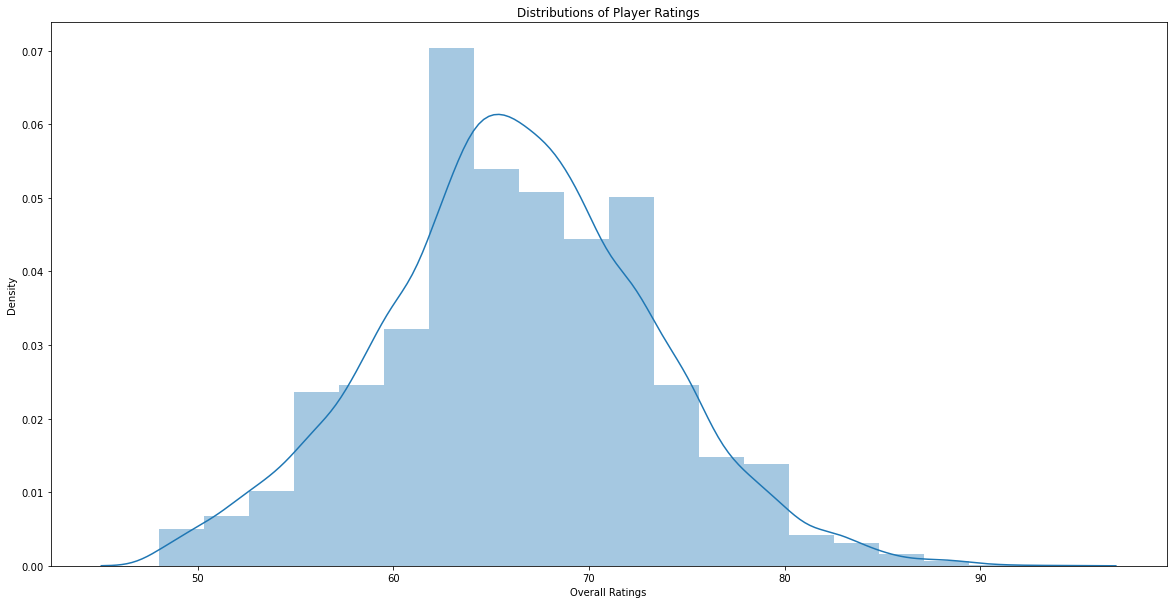

In [34]:
plt.figure(figsize=(20,10))
ax = sns.distplot(data.overall, bins=20);
ax.set_title('Distributions of Player Ratings')
ax.set_xlabel('Overall Ratings');

Since, `overall` decides the overall quality of a player, we can plot its histogram to visualize how players are distributed. For the purpose of this notebook, we will remove players with `overall` rating lower than 70. This is just a soft criterion and a generally decent score on FIFA.

Here we see an almost normal distribution of player age with their rankings.

In [35]:
data = data[data.overall>=70]

In [36]:
pd.DataFrame(data.overall.value_counts().sort_index())

,overall
70,902
71,715
72,753
73,638
74,529
75,506
76,361
77,262
78,239
79,185


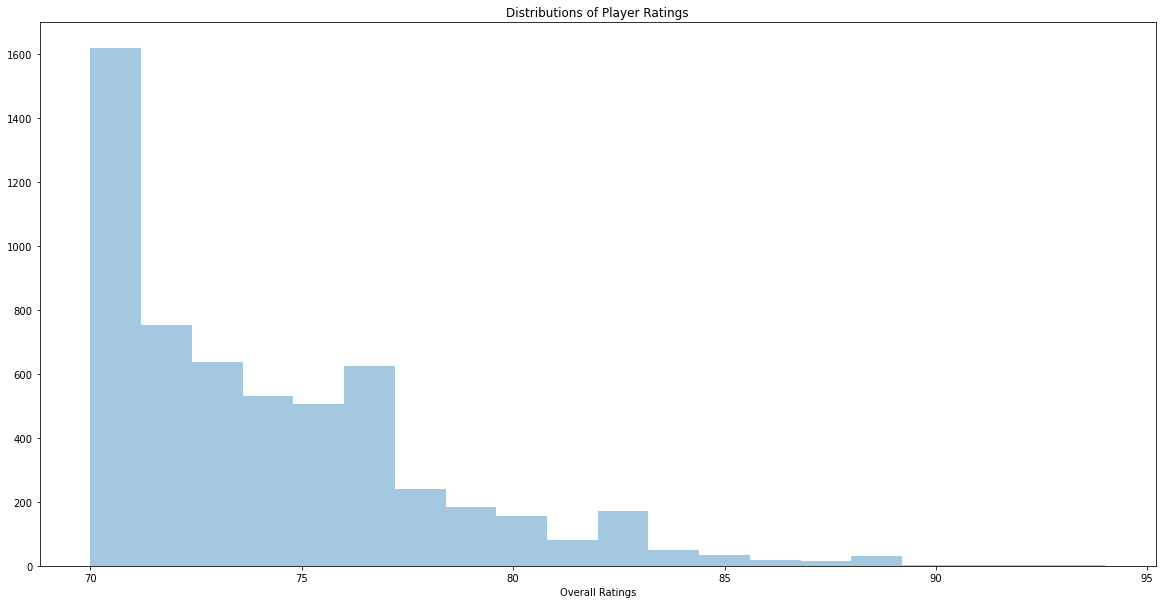

In [37]:
plt.figure(figsize=(20,10))
ax = sns.distplot(data.overall, bins=20,vertical=False,kde=False);
ax.set_title('Distributions of Player Ratings')
ax.set_xlabel('Overall Ratings');

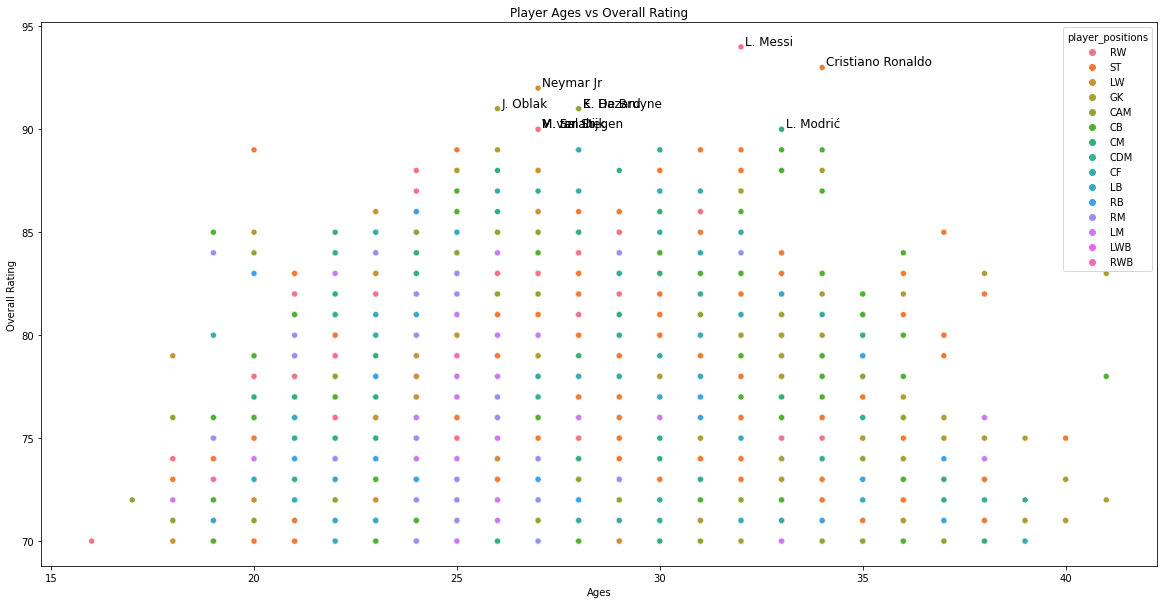

In [38]:
plt.figure(figsize=(20,10))
ax = sns.scatterplot('age','overall',hue='player_positions',data=data);
ax.set_title('Player Ages vs Overall Rating')
ax.set_xlabel('Ages')
ax.set_ylabel('Overall Rating')

def label_point(x, y, val, ax):
    a = pd.concat({'x': x, 'y': y, 'val': val}, axis=1)
    for i, point in a.iterrows():
        if (point['y'] >=90) :
            ax.text(point['x']+.1, point['y']+.1, str(point['val']),fontsize=12)

label_point( data.age,data.overall, data.short_name, plt.gca())  

1. We see an obvious yet interesting insight here that a player reaches his maximum potential during the middle of his career, usually in between 25-32 years of age. Since we suspect the data to be highly correlated, we will look at a heatmap of the correlations in the data below.

In [39]:
to_drop = ['sofifa_id','player_url','long_name','potential','dob',\
           'work_rate','body_type','real_face','release_clause_eur','player_tags',\
           'team_position','team_jersey_number','loaned_from','joined','contract_valid_until',\
           'nation_position','nation_jersey_number','player_traits',\
           'ls','st','rs','lw','lf','cf','rf','rw','lam','cam','ram','lm','lcm','cm','rcm',\
           'rm','lwb','ldm','cdm','rdm','rwb','lb','lcb','cb','rcb','rb', 'value_eur','wage_eur']
data = data.drop(to_drop, axis=1)

In [40]:
pd.DataFrame(data.dtypes).T

,short_name,age,height_cm,weight_kg,nationality,club,overall,player_positions,preferred_foot,international_reputation,weak_foot,skill_moves,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes
0,object,int64,int64,int64,object,object,int64,object,object,int64,int64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64


Lets look at the correlation in the dataset

In [41]:
# Create correlation matrix
corr_matrix = data.corr().abs()

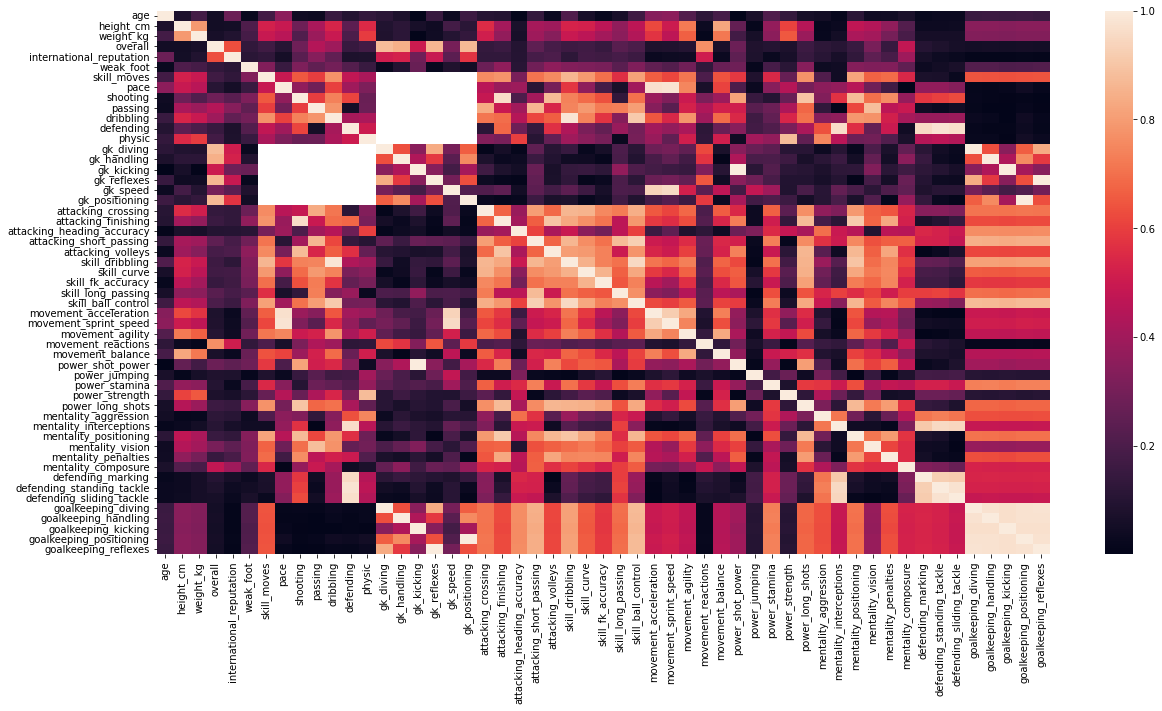

In [42]:
plt.figure(figsize=(20,10))
ax = sns.heatmap(corr_matrix)

As we can see, goalkeeper related features are perfectly correlated as seen by the white squares in the data. Goalkeepers are a separate group and none of the main player skills apply to goalkeepers. We will assume this as a separate cluster and remove all goalkeepers from the dataset. Now we will have to also drop the rows with player_position with the value GK. That is, we will also drop all the goalkeepers from the dataset. PCA requires continuous features only and hence we will also drop all features that are categorical. The reason for this is that PCA looks to capture the maximum variance in the data in the principal components and categorical features are discrete in nature with zero variance.

In [43]:
goalkeeper_features = ['gk_handling','gk_reflexes','gk_positioning','gk_diving','gk_kicking','gk_speed',\
                       'goalkeeping_diving','goalkeeping_handling','goalkeeping_kicking','goalkeeping_positioning','goalkeeping_reflexes']
data = data.drop(goalkeeper_features, axis = 1)

Now we will have to also drop the rows with `player_position` with the value `GK`. That is, we will also drop all the goalkeepers from the dataset.

In [44]:
data = data[data.player_positions !='GK']

Now let's drop all the categorical features

In [45]:
categorical_features = ['short_name','nationality','club','preferred_foot','player_positions','international_reputation','weak_foot','skill_moves']
data = data.drop(categorical_features, axis =1)
data = data.fillna(0)
data.shape

(5137, 39)

# Feature Scaling

Since, for PCA we need scaled data, we will transform the dataset by trying various scaling techniques. The original distribution of the dataset can be seen in the figure below.

In [47]:
data.describe()

,age,height_cm,weight_kg,overall,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle
count,5137.000000,5137.000000,5137.000000,5137.000000,5137.000000,5137.000000,5137.000000,5137.000000,5137.000000,5137.000000,5137.000000,5137.000000,5137.000000,5137.000000,5137.000000,5137.000000,5137.000000,5137.000000,5137.000000,5137.000000,5137.000000,5137.000000,5137.000000,5137.000000,5137.000000,5137.000000,5137.000000,5137.000000,5137.000000,5137.000000,5137.000000,5137.000000,5137.000000,5137.000000,5137.000000,5137.000000,5137.000000,5137.000000,5137.000000
mean,27.238466,180.846019,75.636948,74.111154,69.666342,60.459217,65.313996,69.592564,57.571540,69.998053,61.991435,57.375900,63.390695,70.702939,54.812147,68.484135,60.446759,54.202842,64.488417,71.441697,69.533191,69.754526,69.642788,71.002531,67.533969,68.626630,68.827720,72.396535,70.092272,60.560055,66.917656,57.048277,62.718123,63.685420,58.130816,69.945688,57.036208,57.433132,54.375900
std,3.956364,6.577557,6.848237,3.774699,12.341946,13.421034,8.766157,9.062523,17.534789,8.248926,13.665833,16.431612,11.807095,6.730381,15.634589,11.098670,15.046577,15.943159,10.100465,7.548968,12.941145,12.470975,12.539995,5.719511,13.123799,10.985493,12.037265,10.093500,11.576747,14.857905,13.383629,19.804241,14.866945,12.294777,12.978836,7.029337,18.685654,20.464711,21.101802
min,16.000000,156.000000,52.000000,70.000000,29.000000,15.000000,34.000000,34.000000,18.000000,35.000000,11.000000,12.000000,20.000000,41.000000,11.000000,17.000000,12.000000,10.000000,21.000000,33.000000,28.000000,29.000000,26.000000,50.000000,26.000000,15.000000,29.000000,29.000000,27.000000,12.000000,22.000000,10.000000,12.000000,13.000000,13.000000,32.000000,10.000000,10.000000,10.000000
25%,24.000000,176.000000,71.000000,71.000000,63.000000,52.000000,60.000000,66.000000,40.000000,65.000000,55.000000,45.000000,56.000000,67.000000,43.000000,64.000000,51.000000,41.000000,59.000000,68.000000,63.000000,64.000000,63.000000,67.000000,60.000000,63.000000,62.000000,67.000000,63.000000,54.000000,59.000000,39.000000,56.000000,58.000000,49.000000,65.000000,41.000000,38.000000,34.000000
50%,27.000000,181.000000,75.000000,73.000000,71.000000,64.000000,67.000000,71.000000,66.000000,71.000000,65.000000,61.000000,65.000000,71.000000,58.000000,71.000000,64.000000,56.000000,66.000000,72.000000,71.000000,71.000000,71.000000,71.000000,69.000000,71.000000,70.000000,73.000000,71.000000,65.000000,70.000000,66.000000,67.000000,66.000000,60.000000,70.000000,65.000000,68.000000,64.000000
75%,30.000000,186.000000,80.000000,76.000000,78.000000,70.000000,71.000000,76.000000,72.000000,76.000000,72.000000,70.000000,72.000000,75.000000,67.000000,76.000000,72.000000,68.000000,71.000000,76.000000,78.000000,78.000000,78.000000,74.000000,76.000000,76.000000,77.000000,79.000000,78.000000,71.000000,76.000000,73.000000,73.000000,72.000000,68.000000,75.000000,72.000000,74.000000,72.000000
max,41.000000,203.000000,101.000000,94.000000,96.000000,93.000000,92.000000,96.000000,90.000000,90.000000,93.000000,95.000000,93.000000,92.000000,90.000000,97.000000,94.000000,94.000000,92.000000,96.000000,97.000000,96.000000,96.000000,96.000000,96.000000,95.000000,95.000000,97.000000,95.000000,94.000000,95.000000,92.000000,95.000000,94.000000,92.000000,96.000000,94.000000,92.000000,90.000000


No handles with labels found to put in legend.


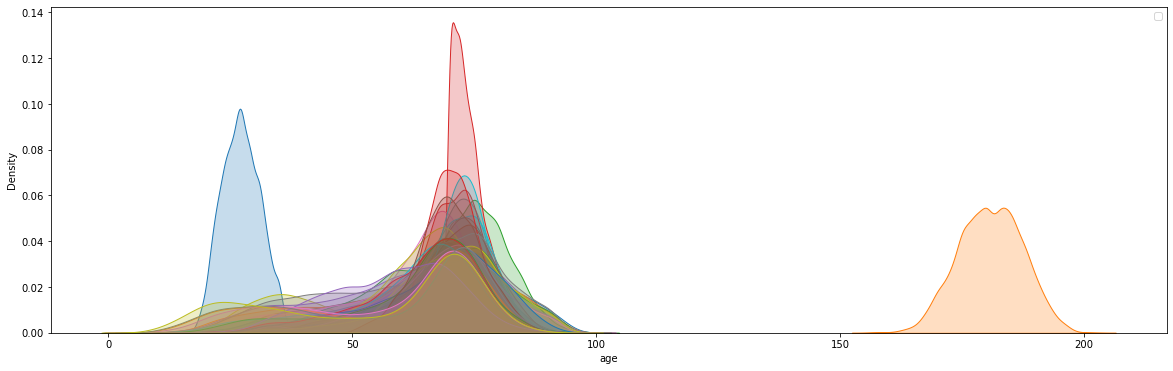

In [48]:
plt.figure(figsize=(20,6))
for col in data.columns:
    sns.kdeplot(data[col], shade=True)
plt.legend(loc='best');

We can notice that the features are on different scales and most of the features are slightly left-skewed. We try the following scaling techniques on the data and chose the one that results in the best explained variance by the first two principal components:    

| Scaling Technique |
|------|
|   Log Scaling	  |
|   Standard Scaling  |
|   Min Max Scaling  |
|   Log normal Scaling  |

## Transforming the data for PCA

In [50]:
from sklearn.decomposition import PCA
def pca_results(data, n_components=8):
    #PCA model
    pca = PCA(n_components=n_components, random_state=1).fit(data)
    
    #DataFrame creation
    dimensions = ['Dimension {}'.format(i) for i in range(1,len(pca.components_)+1)]
    components = pd.DataFrame(np.round(pca.components_, 4), columns = list(data.columns))
    components.index = dimensions

    # PCA explained variance
    ratios = pca.explained_variance_ratio_.reshape(len(pca.components_), 1)
    variance_ratios = pd.DataFrame(np.round(ratios, 4), columns = ['Explained Variance'])
    variance_ratios.index = dimensions

    # Create a bar plot visualization
    fig, ax = plt.subplots(figsize = (25,10))

    # Plot the feature weights as a function of the components
    components.plot(ax = ax, kind = 'bar');
    ax.set_ylabel("Feature Weights")
    ax.set_xticklabels(dimensions, rotation=0)
    plt.legend(loc='upper right')

    # Display the explained variance ratios
    for i, ev in enumerate(pca.explained_variance_ratio_):
        ax.text(i-0.40, ax.get_ylim()[1] + 0.05, "Explained Variance\n%.4f"%(ev))

    # Return a concatenated DataFrame
    df = pd.concat([variance_ratios, components], axis = 1)
    print(f'Total Variance Explained by the first 2 dimensions: {df.iloc[:2,0].sum()}')
    return df

In [51]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

log_data = np.log(data)

scaler = StandardScaler()
minmax = MinMaxScaler()

minmax.fit(data)
scaler.fit(data)

scaled_data = scaler.transform(data)
scaled_data = pd.DataFrame(scaled_data, columns=data.columns)

minmax_data = minmax.transform(data)
minmax_data = pd.DataFrame(minmax_data, columns=data.columns)

scaler.fit(log_data)
log_normal_data = scaler.transform(log_data)
log_normal_data = pd.DataFrame(log_normal_data, columns=data.columns)

In [52]:
def plot_transformed_data(data):
    plt.figure(figsize=(20,6))
    for col in data.columns:
        sns.kdeplot(data[col], shade=True)
    plt.legend(loc='best');

No handles with labels found to put in legend.


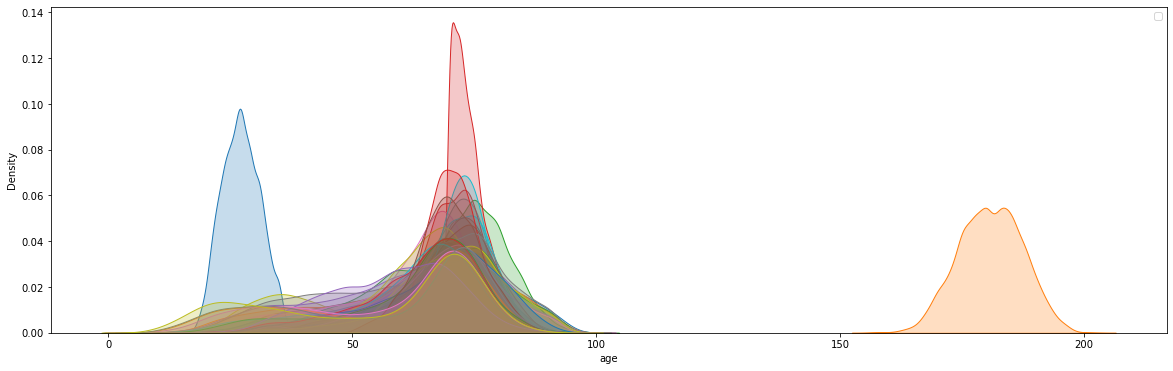

In [53]:
#Data
plot_transformed_data(data)

No handles with labels found to put in legend.


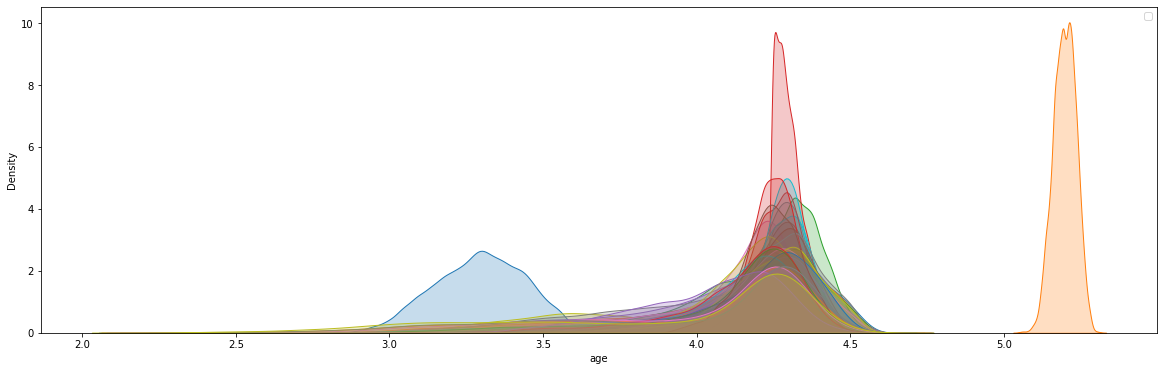

In [54]:
#Log
plot_transformed_data(log_data)

No handles with labels found to put in legend.


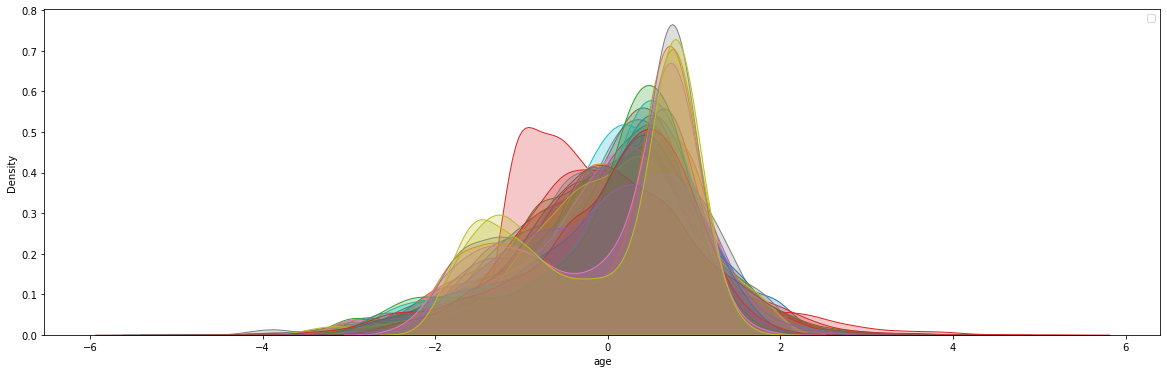

In [55]:
plot_transformed_data(scaled_data)

No handles with labels found to put in legend.


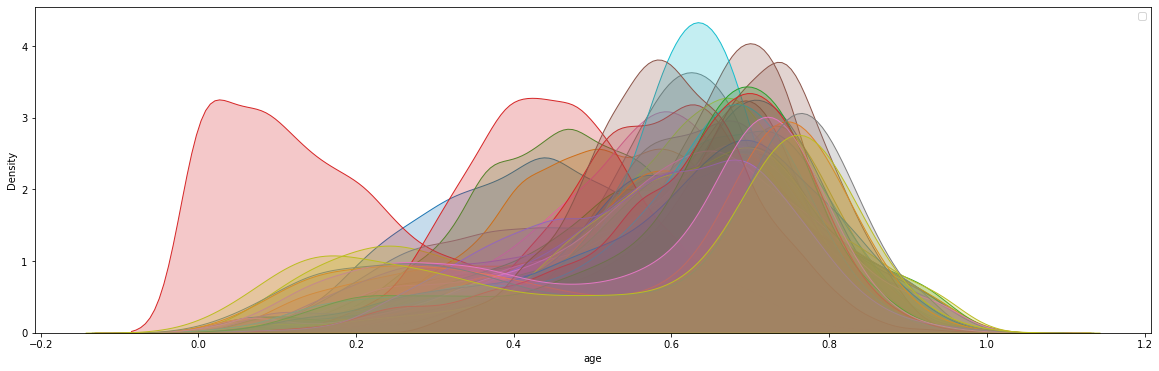

In [56]:
plot_transformed_data(minmax_data)

No handles with labels found to put in legend.


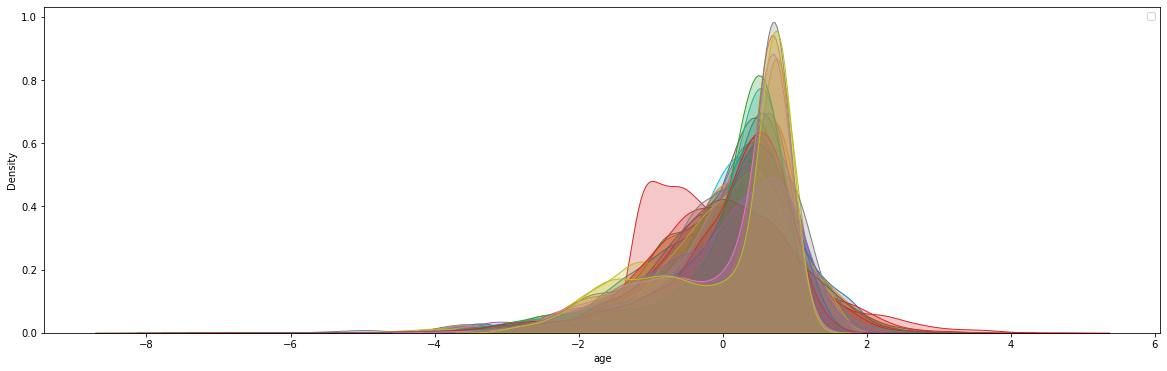

In [57]:
plot_transformed_data(log_normal_data)

Total Variance Explained by the first 2 dimensions: 0.7071999999999999


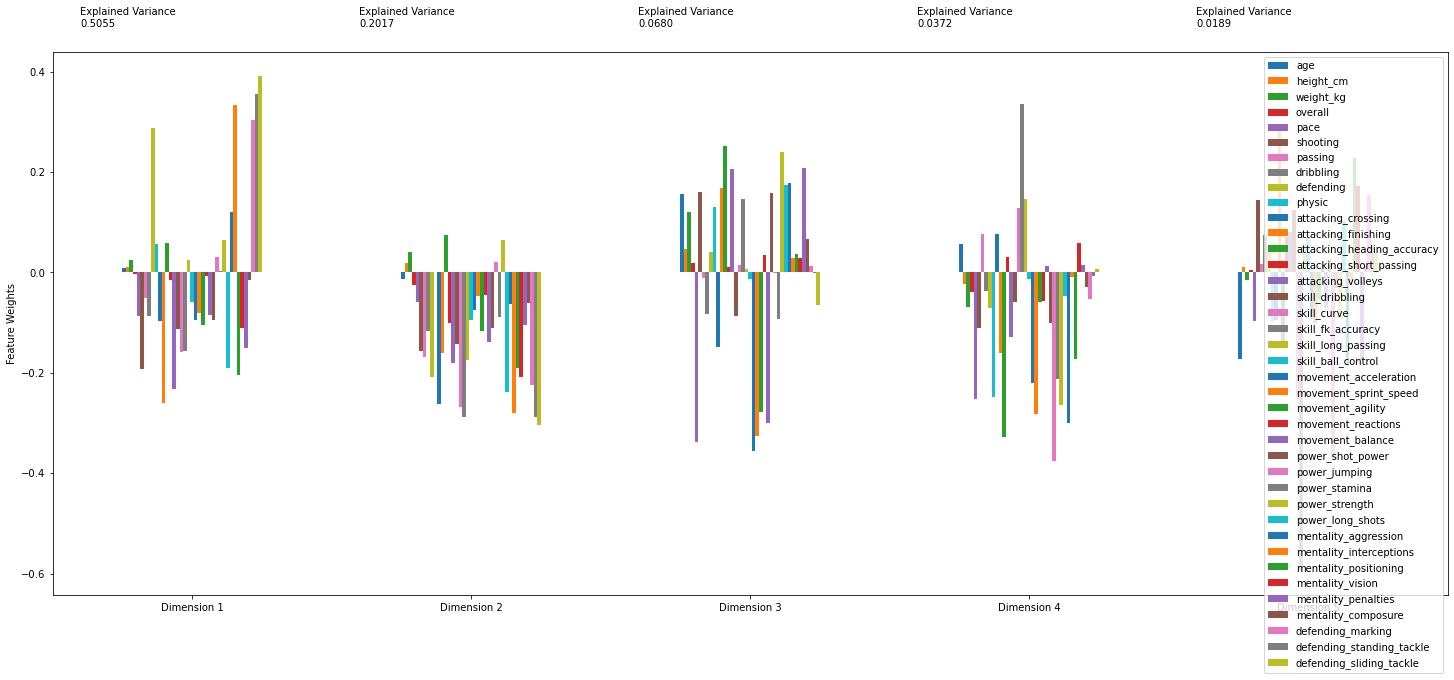

In [58]:
pca_log = pca_results(log_data, 5)

Total Variance Explained by the first 2 dimensions: 0.5625


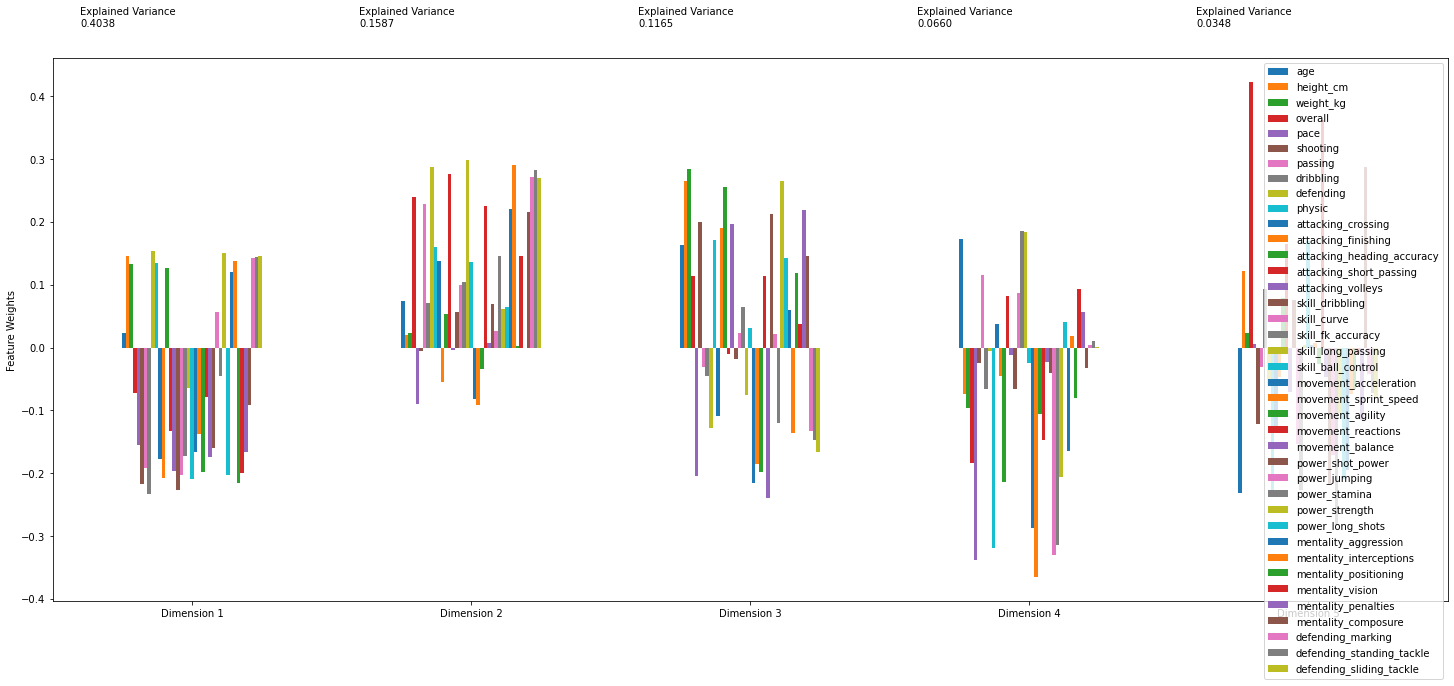

In [59]:
pca_scaled = pca_results(scaled_data, 5)

Total Variance Explained by the first 2 dimensions: 0.612


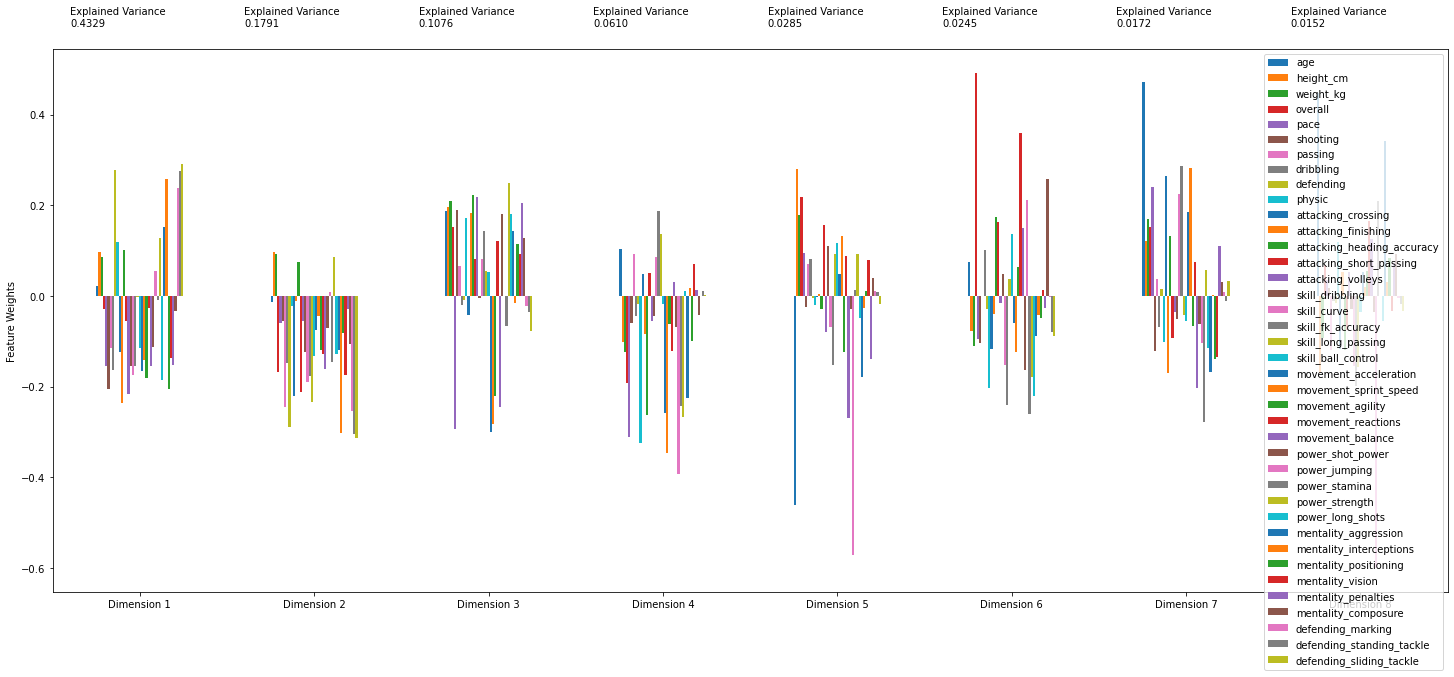

In [60]:
pca_minmax = pca_results(minmax_data)

Total Variance Explained by the first 2 dimensions: 0.5467


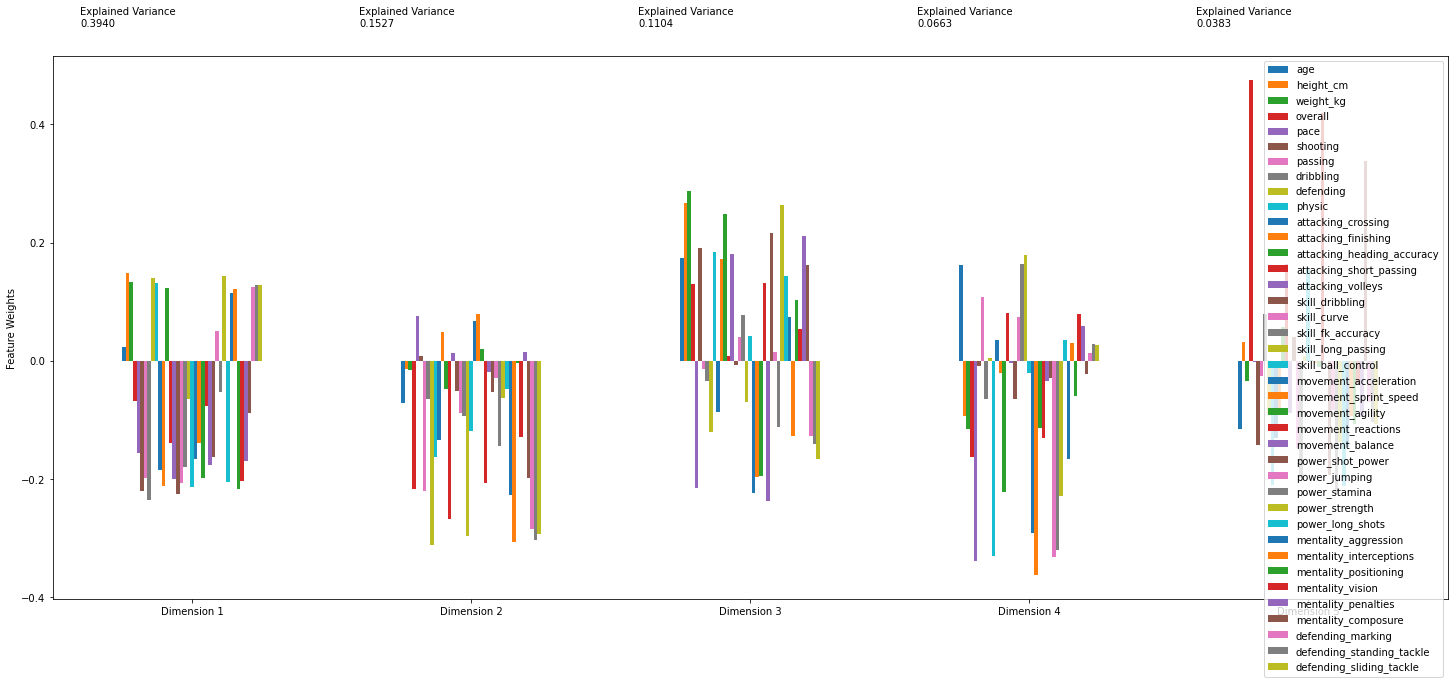

In [61]:
pca_log_normal = pca_results(log_normal_data,5)

The scaling techniques and variance explained by the first two principal components are summarized in the table below:

| Scaling Technique | Variance explained by PC1 and PC2 |
|------|------|
|   Log Scaling	  |    68.4%    |
|   Standard Scaling  |    52.5%    |
|   Min Max Scaling  |    57.2%    |
|   Log normal Scaling  |    50.8%    |


# PCA Analysis

When using principal component analysis, one of the main goals is to reduce the dimensionality of the data — in effect, reducing the complexity of the problem.    
However, dimensionality reduction comes at a cost as fewer dimensions used implies less of the total variance in the data is being explained. Because of this, the cumulative explained variance ratio is extremely important for knowing how many dimensions are necessary for the problem. Additionally, if a significant amount of variance is explained by only two or three dimensions, the reduced data can be visualized afterwards.    

Since PCs describe variation and account for the varied influences of the original characteristics, we can plot the PCs to find out which feature produces the differences among clusters.    
To do this we plot the loadings, or vectors representing each feature of the PC plot centered at (0, 0) with the direction and length of these vectors showing how much significance each feature has on the PCs. Also, the angle between these vectors let us know correlation between the features with a small angle denoting high correlation. A plot that visualizes the above information is called a Biplot.


In [62]:
def make_pca(data, sample_ids):
    pca = PCA(n_components=2).fit(data)
    reduced_data = pca.transform(log_data)
    pca_samples = pca.transform(log_data[log_data.index.isin(sample_ids)])
    reduced_data = pd.DataFrame(reduced_data, columns = ['Dimension 1', 'Dimension 2'])
    return pca, reduced_data, pca_samples


In [63]:
pca, reduced_data, pca_samples = make_pca(log_data, sample_ids = generate_samples(['CAM','CM']))

In [65]:
def biplot(log_data, reduced_data, pca):

    fig, ax = plt.subplots(figsize = (10,10))
    # scatterplot of the reduced data    
    ax.scatter(x=reduced_data.loc[:, 'Dimension 1'], y=reduced_data.loc[:, 'Dimension 2'], 
        facecolors='b', edgecolors='b', s=70, alpha=0.5)
    
    feature_vectors = pca.components_.T

    # we use scaling factors to make the arrows easier to see
    arrow_size, text_pos = 4.0, 5.0,

    # projections of the original features
    for i, v in enumerate(feature_vectors):
        ax.arrow(0, 0, arrow_size*v[0], arrow_size*v[1], 
                  head_width=0.2, head_length=0.2, linewidth=2, color='red')
        ax.text(v[0]*text_pos, v[1]*text_pos, log_data.columns[i], color='black', 
                 ha='center', va='center', fontsize=18)

    ax.set_xlabel("Dimension 1", fontsize=14)
    ax.set_ylabel("Dimension 2", fontsize=14)
    ax.set_title("PC plane with original feature projections.", fontsize=16);
    return ax
    

The Biplot for our dataset is provided below. As we can see, the features mentality_interceptions, defending_sliding_tackle and defending_marking is close together. Also, these strongly influence both PC1 and PC2.  

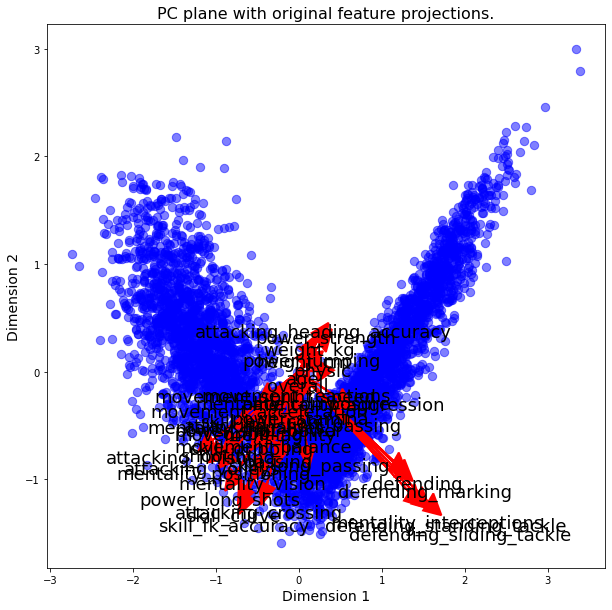

In [66]:
biplot(log_data, reduced_data, pca);

# Clustering

In this section, we choose to use a K-Means clustering algorithm to identify the various player segments hidden in the data.    
Advantages of KMeans clustering algorithm are: Kmeans is very fast. This is because Kmeans only needs to fit data to cluster centers. This makes KMeans faster in training.    
However, one drawback is that KMeans only assigns hard clusters and does not give the probability score of the cluster.     

Depending on the problem, the number of clusters in the data may not be known in advance. As a result, we do not know for sure if a certain number of clusters are the best choice for our data. Since we do not know the structure present in the data, in order to measure the “goodness” of our clustering, we calculate each point’s **silhouette coefficient.**    

The silhouette coefficient for a data point measures how similar it is to its assigned cluster from -1 (dissimilar) to 1 (similar). Calculating the mean silhouette coefficient provides for a simple scoring method of a given clustering.    

The Silhouette Coefficient is defined for each sample and is composed of two scores (a and b):

a.	The mean distance between a sample and all other points in the same class.
b.	The mean distance between a sample and all other points in the next nearest cluster.    

The Silhouette Coefficient s for a single sample is then given as:

$$ s = \frac{b-a}{max(a, b)}$$


The Silhouette Coefficient for a set of samples is given as the mean of the Silhouette Coefficient for each sample. In our analysis, we receive the highest Silhouette Score of about `0.53` for three clusters. Another popular method to guess the appropriate number of clusters is the **Elbow Method**. In this method, we choose that value of `K`, which lies at the elbow of the curve plotted between the number of clusters and sum of distances between each point and its centroid. As we can see from the image below, the elbow of the curve appears at 3 clusters thus concurring with the Silhouette score.

In [67]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

def cluster(reduced_data,n_clusters,pca_samples=pca_samples):
    clusterer = KMeans(n_clusters=n_clusters, random_state=123).fit(reduced_data)    
    preds = clusterer.predict(reduced_data)
    centers = clusterer.cluster_centers_
    sample_preds = clusterer.predict(pca_samples)
    return preds, centers, sample_preds

def silhouette_scorer(reduced_data,n_clusters):
    preds,_,_ = cluster(reduced_data,n_clusters)
    score = silhouette_score(reduced_data, preds)
    return score

for n_clusters in range(2,10):
    score = silhouette_scorer(reduced_data,n_clusters)
    print ("Silhoutte Score for {} cluster is {}".format(n_clusters,score))


Silhoutte Score for 2 cluster is 0.5170928739381522
Silhoutte Score for 3 cluster is 0.5459243692375262
Silhoutte Score for 4 cluster is 0.48404473048766256
Silhoutte Score for 5 cluster is 0.4544909257163212
Silhoutte Score for 6 cluster is 0.41664434681298146
Silhoutte Score for 7 cluster is 0.39595021282372445
Silhoutte Score for 8 cluster is 0.37271655009589766
Silhoutte Score for 9 cluster is 0.36844794236495876


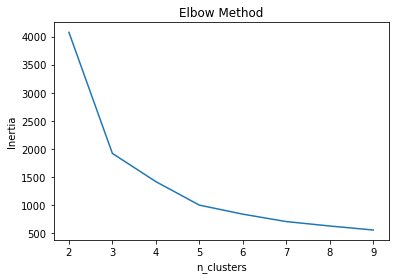

In [68]:
inertia = []
clusters = range(2,10)
for n_clusters in clusters:
    clusterer = KMeans(n_clusters=n_clusters, random_state=123).fit(reduced_data)
    preds = clusterer.predict(reduced_data)
    inertia.append(clusterer.inertia_)

plt.plot(clusters, inertia)
plt.ylabel('Inertia')
plt.xlabel('n_clusters')
plt.title('Elbow Method');


So we get three clusters

In [69]:
def cluster_results(reduced_data, preds, centers, pca_samples):
    '''
    Visualizes the PCA-reduced cluster data in two dimensions
    Adds cues for cluster centers and student-selected sample data
    '''
    import matplotlib.cm as cm
    predictions = pd.DataFrame(preds, columns = ['Cluster'])
    plot_data = pd.concat([predictions, reduced_data], axis = 1)

    # Generate the cluster plot
    fig, ax = plt.subplots(figsize = (14,8))

    # Color map
    cmap = cm.get_cmap('gist_rainbow')

    # Color the points based on assigned cluster
    for i, cluster in plot_data.groupby('Cluster'):   
        cluster.plot(ax = ax, kind = 'scatter', x = 'Dimension 1', y = 'Dimension 2', \
                     color = cmap((i)*1.0/(len(centers)-1)), label = 'Cluster %i'%(i), s=30);

    # Plot centers with indicators
    for i, c in enumerate(centers):
        ax.scatter(x = c[0], y = c[1], color = 'white', edgecolors = 'black', \
                   alpha = 1, linewidth = 2, marker = 'o', s=200);
        ax.scatter(x = c[0], y = c[1], marker='$%d$'%(i), alpha = 1, s=100);

    # Plot transformed sample points 
    ax.scatter(x = pca_samples[:,0], y = pca_samples[:,1], \
               s = 150, linewidth = 4, color = 'black', marker = 'x');

    # Set plot title
    ax.set_title("Cluster Learning on PCA-Reduced Data - Centroids Marked by Number\nTransformed Sample Data Marked by Black Cross");

In [70]:
original_data.player_positions.unique()

array(['RW', 'ST', 'LW', 'GK', 'CAM', 'CB', 'CM', 'CDM', 'CF', 'LB', 'RB',
       'RM', 'LM', 'LWB', 'RWB'], dtype=object)

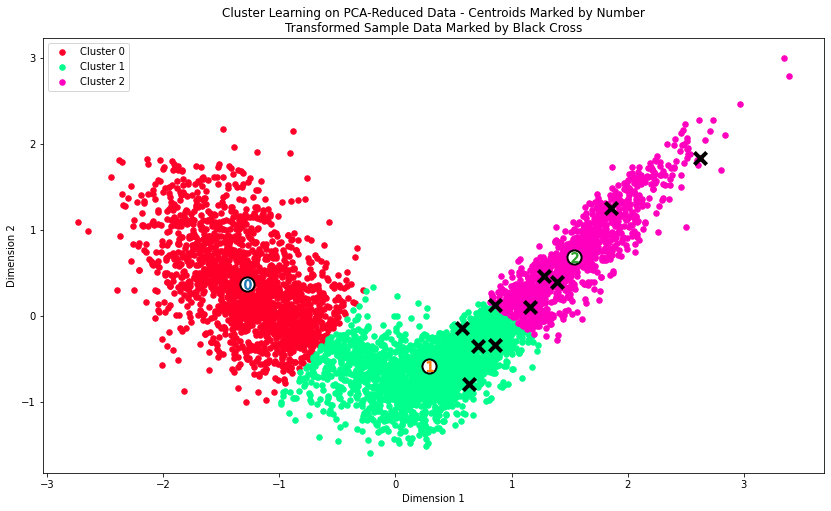

In [71]:
sample_ids = generate_samples(['CB','LB','RB'], 10)

_, _, pca_samples = make_pca(log_data, sample_ids)
preds, centers, sample_preds = cluster(reduced_data, 3)
cluster_results(reduced_data, preds, centers, pca_samples)

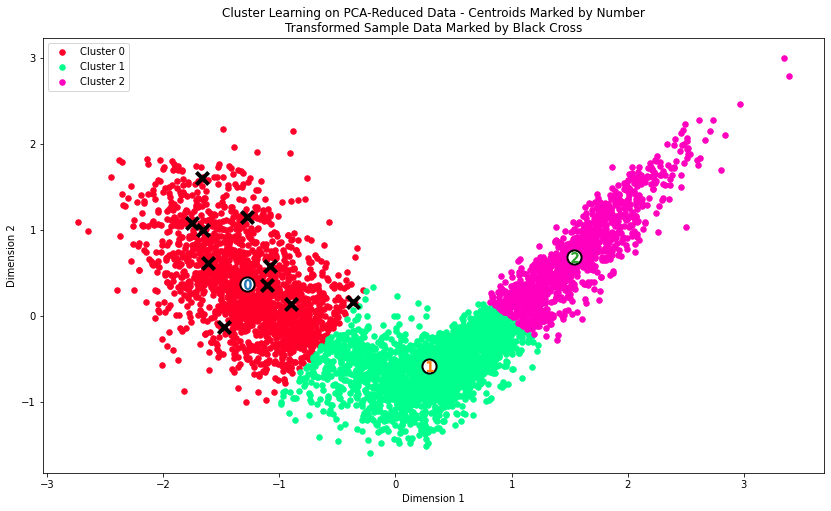

In [72]:
sample_ids = generate_samples(['ST','CF'], 10)

_, _, pca_samples = make_pca(log_data, sample_ids)
preds, centers, sample_preds = cluster(reduced_data, 3)
cluster_results(reduced_data, preds, centers, pca_samples)

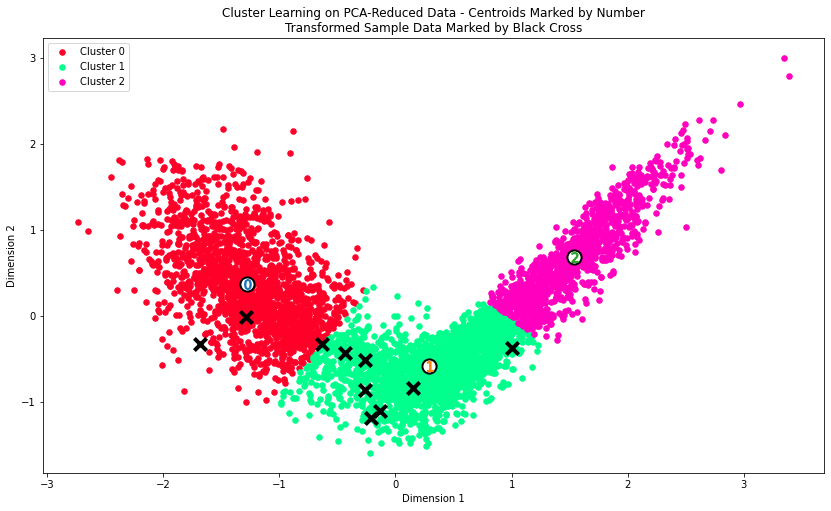

In [73]:
sample_ids = generate_samples(['CM','RM','LM','CAM','CDM'], 10)

_, _, pca_samples = make_pca(log_data, sample_ids)
preds, centers, sample_preds = cluster(reduced_data, 3)
cluster_results(reduced_data, preds, centers, pca_samples)

# Results

It appears that from the results above, the clusters are separated by the three main playing positions in the game.

- Forwards (Green cluster or Cluster 1)
- Midfielders (Pink cluster or Cluster 2)
- Defenders (Red cluster or Cluster 0)

## Interpretation

In order to understand why K Means returned the clusters that it returned, we should go back to the Biplot visualization above.    
The Biplot maps the original features as vectors to the principal components and comparing the clusters and the feature vectors, it becomes obvious.    

For example, lets take a look at Cluster 0, which is the Red cluster. We have inferred that its a cluster of defenders based on the random samples. Now, if we take a look at the Biplot, we can see that some of the features vectors have strong influence along the direction of this cluster is `defending_marking`, `mentality_interceptions`, `defending_sliding_tackle`.    

Similarly, we can observe that, the most important features in along cluster 2 are `skill_long_passing`, `short_passing`, `power_stamina`, `mental_composure` etc. Thus, we can infer that midfielders are the players that possess these traits and we can identify the strongest players in this cluster for a midfielder role.

And finally, for a forward player, the main job is to score goals and naturally, the important features along this direction are Some of the key ones are `attacking`, `volleys`, `mentality_positioning`, `attacking_header_accuracy`. 